# <center>Part Three: Exploratory Data Analysis of Zillow Housing Data<center>

#### Now that the master dataset of scraped Zillow housing data has been appended together from part one, this part will be all about analyzing and exploring the data in a little more depth. Some exploratory data analysis, correlation analysis, along with some visualization will be performed.

#### Some business questions I would like to answer through analysis:
1. What are the average prices of houses in each state? Which states are most expensive? Least expensive?
2. How many house listings are priced under the overall average of house listings? How many houses priced over $1 million?
3. What are the average prices of homes based on beds, baths, and SqFt?
4. Which variables appear to impact house prices? # of beds? # of baths? SqFt?

## Import Needed Python Packages

In [22]:
# Packages
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set some dataframe output settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Read in Zillow Housing Master Dataset

In [23]:
df=pd.read_excel("StateData/AllHousingData.xlsx")
df.head(10)
#df.head(1000)

,prices,address,links,beds,baths,sqft,street,city,state,zip
0,125000.00000,"204 Powell St S, Union Springs, AL 36089",https://www.zillow.com/homedetails/204-Powell-St-S-Union-Springs-AL-36089/249215991_zpid/,5,3,4575.00000,204 Powell St S,Union Springs,AL,36089.00000
1,210000.00000,"317 Arrow Ave, Satsuma, AL 36572",https://www.zillow.com/homedetails/317-Arrow-Ave-Satsuma-AL-36572/50955075_zpid/,4,3,1789.00000,317 Arrow Ave,Satsuma,AL,36572.00000
2,185000.00000,"801 Washington St, Marion, AL 36756",https://www.zillow.com/homedetails/801-Washington-St-Marion-AL-36756/109570560_zpid/,5,2,5.00000,801 Washington St,Marion,AL,36756.00000
3,18500.00000,"216 Lincoln St, Roanoke, AL 36274",https://www.zillow.com/homedetails/216-Lincoln-St-Roanoke-AL-36274/2091627073_zpid/,2,1,1621.00000,216 Lincoln St,Roanoke,AL,36274.00000
4,20000.00000,"0 County Road 351, Crane Hill, AL 35053",https://www.zillow.com/homedetails/0-County-Road-351-Crane-Hill-AL-35053/2078925105_zpid/,40,NaN,nan,0 County Road 351,Crane Hill,AL,35053.00000
5,225000.00000,"2434 Mckenzie Ct W, Saraland, AL 36571",https://www.zillow.com/homedetails/2434-Mckenzie-Ct-W-Saraland-AL-36571/118258954_zpid/,4,2,1679.00000,2434 Mckenzie Ct W,Saraland,AL,36571.00000
6,73500.00000,"299 Mcelroy Dr, Woodstock, AL 35188",https://www.zillow.com/homedetails/299-Mcelroy-Dr-Woodstock-AL-35188/111401730_zpid/,3,2,2330.00000,299 Mcelroy Dr,Woodstock,AL,35188.00000
7,200000.00000,"35 Frazier Rd, Riverside, AL 35135",https://www.zillow.com/homedetails/35-Frazier-Rd-Riverside-AL-35135/243122260_zpid/,3,2,2676.00000,35 Frazier Rd,Riverside,AL,35135.00000
8,229900.00000,"89 Killebrew St, Newton, AL 36352",https://www.zillow.com/homedetails/89-Killebrew-St-Newton-AL-36352/75958073_zpid/,6,6,3276.00000,89 Killebrew St,Newton,AL,36352.00000
9,29900.00000,"1711 Hamilton Rd, Pell City, AL 35128",https://www.zillow.com/homedetails/1711-Hamilton-Rd-Pell-City-AL-35128/171962_zpid/,3,1,952.00000,1711 Hamilton Rd,Pell City,AL,35128.00000


## Final Data Cleaning/Processing

#### As mentioned at the end of part one, null values were not handled during the initial data cleaning. I will now look for nulls and remove them from the dataset.

#### Most null values and rows that will be removed are those that are plots of land or acres of land for sale because they do not have number of beds or baths listed. I am interested in houses only and by removing rows with nulls, will remove all land/plot listings.

In [24]:
# Check for nulls in each column
df.isnull().sum(axis = 0)

prices       10
address       0
links         0
beds         32
baths       890
sqft       3741
street        0
city          1
state       127
zip         133
dtype: int64

In [25]:
# Check length/rows of dataset
len(df)

30480

In [26]:
# Remove all null values from any row containing nulls
df = df.dropna(how='any',axis=0) 

In [27]:
# Check to ensure nulls were removed
df.isnull().sum(axis = 0)

prices     0
address    0
links      0
beds       0
baths      0
sqft       0
street     0
city       0
state      0
zip        0
dtype: int64

In [28]:
# Check new length of dataset
len(df)

26607

In [29]:
# See value counts of each state 
df['state'].value_counts()

# See value counts of all columns for each state
#dfclean.groupby("state").count()

CT    594
MA    586
MD    584
CA    583
AL    582
VA    580
IN    575
MS    571
DC    571
MN    569
FL    569
AR    566
NE    564
IL    563
OH    563
ND    562
LA    561
KS    557
GA    557
TX    548
NV    544
IA    544
PA    543
HI    543
SC    542
AZ    538
OR    531
ME    525
WA    523
MI    522
VT    521
WI    519
SD    515
CO    506
WV    498
NH    495
KY    490
NY    489
UT    489
NM    486
TN    478
MO    477
RI    475
WY    474
DE    465
NC    461
AK    435
ID    427
MT    397
OK    377
NJ    373
Name: state, dtype: int64

<AxesSubplot:title={'center':'Number of House Listings By State'}>

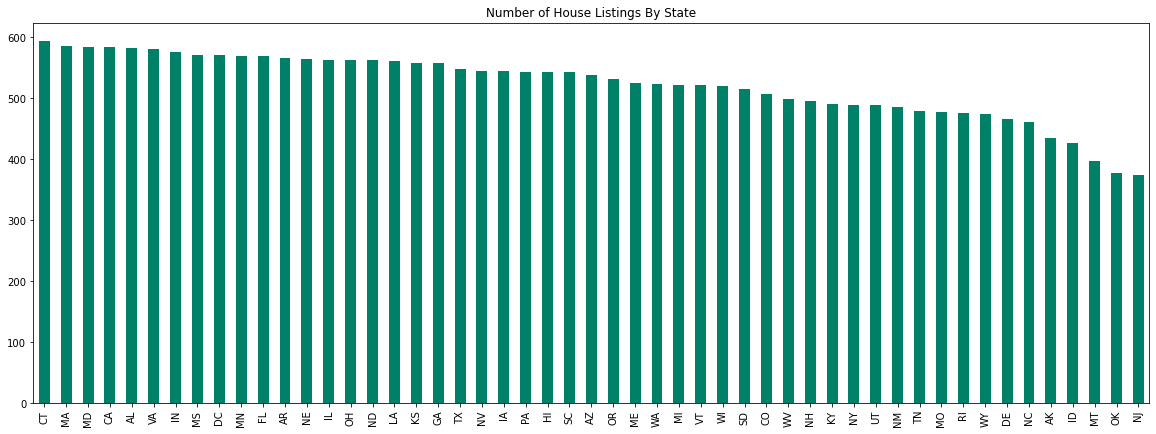

In [30]:
# See value counts of each state by bar chart 
df['state'].value_counts().plot(kind='bar', figsize=(20,7), colormap='summer', title='Number of House Listings By State')

### All null values have now been removed from the dataset and there is still a significant amount of housing data for each state

In [31]:
# Look at datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26607 entries, 0 to 30479
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   prices   26607 non-null  float64
 1   address  26607 non-null  object 
 2   links    26607 non-null  object 
 3   beds     26607 non-null  object 
 4   baths    26607 non-null  object 
 5   sqft     26607 non-null  float64
 6   street   26607 non-null  object 
 7   city     26607 non-null  object 
 8   state    26607 non-null  object 
 9   zip      26607 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.2+ MB


#### Looks like beds and baths need to be converted to float and zip to string to allow analysis of these columns

In [32]:
# Change zip datatype to string
df['zip'] = df['zip'].astype('str')
# Change beds and baths to float ( float instead of integer because some house may have half bathrooms)
df['beds'] = df['beds'].astype('float')
df['baths'] = df['baths'].astype('float')

In [33]:
df.head()

,prices,address,links,beds,baths,sqft,street,city,state,zip
0,125000.00000,"204 Powell St S, Union Springs, AL 36089",https://www.zillow.com/homedetails/204-Powell-St-S-Union-Springs-AL-36089/249215991_zpid/,5.00000,3.00000,4575.00000,204 Powell St S,Union Springs,AL,36089.0
1,210000.00000,"317 Arrow Ave, Satsuma, AL 36572",https://www.zillow.com/homedetails/317-Arrow-Ave-Satsuma-AL-36572/50955075_zpid/,4.00000,3.00000,1789.00000,317 Arrow Ave,Satsuma,AL,36572.0
2,185000.00000,"801 Washington St, Marion, AL 36756",https://www.zillow.com/homedetails/801-Washington-St-Marion-AL-36756/109570560_zpid/,5.00000,2.00000,5.00000,801 Washington St,Marion,AL,36756.0
3,18500.00000,"216 Lincoln St, Roanoke, AL 36274",https://www.zillow.com/homedetails/216-Lincoln-St-Roanoke-AL-36274/2091627073_zpid/,2.00000,1.00000,1621.00000,216 Lincoln St,Roanoke,AL,36274.0
5,225000.00000,"2434 Mckenzie Ct W, Saraland, AL 36571",https://www.zillow.com/homedetails/2434-Mckenzie-Ct-W-Saraland-AL-36571/118258954_zpid/,4.00000,2.00000,1679.00000,2434 Mckenzie Ct W,Saraland,AL,36571.0


In [34]:
# Look at some basic Statistics
pd.set_option('display.float_format', lambda x: '%.5f' % x) # Shows full value instead of scientific notation form

df.describe()

,prices,beds,baths,sqft
count,26607.00000,26607.00000,26607.00000,26607.00000
mean,470528.09234,3.37535,2.42643,2086.85248
std,2858110.85507,1.07695,1.74245,1402.71282
min,1.00000,1.00000,0.00000,1.00000
25%,169000.00000,3.00000,2.00000,1394.00000
50%,269900.00000,3.00000,2.00000,1851.00000
75%,395500.00000,4.00000,3.00000,2464.00000
max,115000000.00000,24.00000,213.00000,49568.00000


## Additional Cleaning/Processing
#### It appears from the basic stats above there are some inconsistent or mistaken values on some houses. It would be very rare that the lowest price of a house is $1

In [35]:
# See rows that have house prices of $1
df.loc[df['prices'] == 1]

,prices,address,links,beds,baths,sqft,street,city,state,zip
1877,1.00000,"5 Free Ferry North St, Fort Smith, AR 72903",https://www.zillow.com/homedetails/5-Free-Ferry-North-St-Fort-Smith-AR-72903/2072320794_zpid/,5.00000,2.00000,3630.00000,5 Free Ferry North St,Fort Smith,AR,72903.0
2153,1.00000,"7300 Highway 215, Mulberry, AR 72947",https://www.zillow.com/homedetails/7300-Highway-215-Mulberry-AR-72947/90780346_zpid/,3.00000,3.00000,2646.00000,7300 Highway 215,Mulberry,AR,72947.0
20695,1.00000,"41 Ford Rd S, Mansfield, OH 44905",https://www.zillow.com/homedetails/41-Ford-Rd-S-Mansfield-OH-44905/86603111_zpid/,3.00000,3.00000,2678.00000,41 Ford Rd S,Mansfield,OH,44905.0
20735,1.00000,"41 Ford Rd S, Mansfield, OH 44905",https://www.zillow.com/homedetails/41-Ford-Rd-S-Mansfield-OH-44905/86603111_zpid/,3.00000,3.00000,2678.00000,41 Ford Rd S,Mansfield,OH,44905.0
20775,1.00000,"41 Ford Rd S, Mansfield, OH 44905",https://www.zillow.com/homedetails/41-Ford-Rd-S-Mansfield-OH-44905/86603111_zpid/,3.00000,3.00000,2678.00000,41 Ford Rd S,Mansfield,OH,44905.0
20815,1.00000,"41 Ford Rd S, Mansfield, OH 44905",https://www.zillow.com/homedetails/41-Ford-Rd-S-Mansfield-OH-44905/86603111_zpid/,3.00000,3.00000,2678.00000,41 Ford Rd S,Mansfield,OH,44905.0
20855,1.00000,"41 Ford Rd S, Mansfield, OH 44905",https://www.zillow.com/homedetails/41-Ford-Rd-S-Mansfield-OH-44905/86603111_zpid/,3.00000,3.00000,2678.00000,41 Ford Rd S,Mansfield,OH,44905.0
20895,1.00000,"41 Ford Rd S, Mansfield, OH 44905",https://www.zillow.com/homedetails/41-Ford-Rd-S-Mansfield-OH-44905/86603111_zpid/,3.00000,3.00000,2678.00000,41 Ford Rd S,Mansfield,OH,44905.0
21676,1.00000,"755 SW 1st St, Ontario, OR 97914",https://www.zillow.com/homedetails/755-SW-1st-St-Ontario-OR-97914/86327993_zpid/,3.00000,2.00000,1736.00000,755 SW 1st St,Ontario,OR,97914.0


In [36]:
# Remove the rows with house prices at $1
df = df[df.prices != 1]

In [37]:
# Check basic stats again
df.describe()

,prices,beds,baths,sqft
count,26598.00000,26598.00000,26598.00000,26598.00000
mean,470687.30521,3.37540,2.42631,2086.65328
std,2858581.27546,1.07707,1.74272,1402.88426
min,10.00000,1.00000,0.00000,1.00000
25%,169000.00000,3.00000,2.00000,1393.25000
50%,269900.00000,3.00000,2.00000,1850.50000
75%,396275.00000,4.00000,3.00000,2464.00000
max,115000000.00000,24.00000,213.00000,49568.00000


#### A minimum price of only 10 dollars still seems like a mistake in pricing. To keep an accurate measure of house prices, I will remove all rows that contain a price lower than $50,000

In [38]:
# Keep only rows that have house prices over $50,000
df = df[df['prices'] > 50000] 

In [39]:
len(df)

25755

In [40]:
df.describe()

,prices,beds,baths,sqft
count,25755.00000,25755.00000,25755.00000,25755.00000
mean,485025.37235,3.38967,2.45036,2106.36292
std,2903871.36253,1.07115,1.75593,1414.50562
min,50232.00000,1.00000,0.00000,1.00000
25%,175000.00000,3.00000,2.00000,1408.00000
50%,275000.00000,3.00000,2.00000,1872.00000
75%,399900.00000,4.00000,3.00000,2482.00000
max,115000000.00000,24.00000,213.00000,49568.00000


In [41]:
# Final value counts per state
df.groupby('state').count()

,prices,address,links,beds,baths,sqft,street,city,zip
state,,,,,,,,,
AK,430,430,430,430,430,430,430,430,430
AL,545,545,545,545,545,545,545,545,545
AR,536,536,536,536,536,536,536,536,536
AZ,533,533,533,533,533,533,533,533,533
CA,581,581,581,581,581,581,581,581,581
CO,498,498,498,498,498,498,498,498,498
CT,590,590,590,590,590,590,590,590,590
DC,570,570,570,570,570,570,570,570,570
DE,460,460,460,460,460,460,460,460,460


In [42]:
# Export the final cleaned master dataset of housing data to an excel file to be used in the Power BI dashboard
df.to_excel('FinalZillowHousingData.xlsx', index = False)

#### Now that the data appears to be null free and rows with house prices lower than 50,000 removed, I can now move on to some EDA of Zillow housing prices

## Exploratory Data Analysis

#### Starting with some quick analysis with listed home prices

In [43]:
# What is the average price of all house listings?
df['prices'].mean()

485025.37235488254

In [44]:
# How many houses are priced under the average price?
len(df.loc[df['prices'] <= 485025])

21511

In [45]:
# Number of houses over $1 million
len(df.loc[df['prices'] > 1000000])

# To list the houses over $1 million
#df.loc[df['prices'] >= 1000000]

672

In [46]:
# Average price of houses per state
df.groupby('state')['prices'].mean()

state
AK    424337.96279
AL    233983.87156
AR    225219.67537
AZ    367163.05629
CA   3462588.34940
CO   1404409.44378
CT    400807.20678
DC   1288039.33509
DE    353716.57391
FL    446376.37726
GA    276661.59818
HI   1404100.78704
IA    188097.97889
ID    848171.48113
IL    411769.30505
IN    207283.49606
KS    212631.13454
KY    197000.62527
LA    243217.58212
MA    478917.44425
MD    394632.78307
ME    281449.43849
MI    243067.35471
MN    318048.92613
MO    231659.96976
MS    196472.63822
MT    569742.98705
NC    286184.62389
ND    240969.23321
NE    250842.38278
NH    666610.01639
NJ    393610.20699
NM    282602.48504
NV    442447.33889
NY    833011.92421
OH    222648.46542
OK    210918.02703
OR    414836.12762
PA    270755.27397
RI    622903.45263
SC    261340.89903
SD    286776.21311
TN    301183.20256
TX    298406.46654
UT    683675.71222
VA    289312.16874
VT    355787.02358
WA    478969.43798
WI    267078.55985
WV    185943.71783
WY    374561.61039
Name: prices, dtype: floa

In [47]:
# Show top 5 highest priced states in terms of housing price
df.groupby('state')['prices'].mean().sort_values(ascending = False).head()

state
CA   3462588.34940
CO   1404409.44378
HI   1404100.78704
DC   1288039.33509
ID    848171.48113
Name: prices, dtype: float64

In [48]:
# Show the 5 lowest priced states in terms of housing price
df.groupby('state')['prices'].mean().sort_values(ascending = True).head()

state
WV   185943.71783
IA   188097.97889
MS   196472.63822
KY   197000.62527
IN   207283.49606
Name: prices, dtype: float64

<AxesSubplot:title={'center':'Average Price Of Houses Per State'}, xlabel='state', ylabel='Price in Millions'>

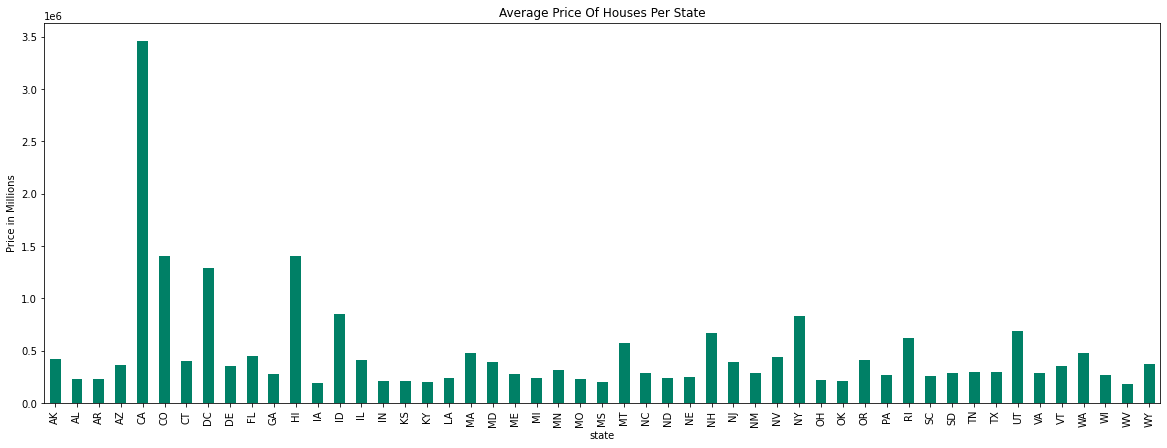

In [49]:
# Average price of houses per state visual
df.groupby('state')['prices'].mean().plot(kind='bar', figsize=(20,7), colormap='summer', title='Average Price Of Houses Per State', ylabel='Price in Millions')

#### Here are some things we found analyzing prices of Zillow house listings in the states:
- The overall average price of houses in all states according to the data scraped is about $485,025
- In the dataset, there are 21,511 listings that are less than or equal to the overall average price of houses. This is roughly 80 percent of the overall listings that fall under or equal the overall average price in all states.
- There are 672 house listings that are priced at 1 Million or more. For those big spenders!

#### The top highest priced states in terms of house prices are:
- California
- Colorado
- Hawaii
- Washington DC
- Idaho

#### The lowest priced states in terms of house prices are:
- West Virginia
- Iowa
- Mississippi
- Kentucky
- Indiana

#### Now some analysis with house details and price (Beds, Baths, SqFt)

In [50]:
# Show average prices of houses per number of bedrooms
df.groupby('beds')['prices'].mean().sort_values(ascending = False)

beds
12.00000   59979590.00000
17.00000   46000000.00000
11.00000   40897991.66667
14.00000   11129900.00000
23.00000   10900000.00000
9.00000     9348276.19048
7.00000     5985220.36893
8.00000     4484096.45882
10.00000    2261800.00000
18.00000     950000.00000
6.00000      938929.72087
5.00000      781032.59970
4.00000      437735.37200
13.00000     359166.66667
3.00000      303326.14370
1.00000      291789.96552
2.00000      287618.29313
24.00000     199900.00000
Name: prices, dtype: float64

<AxesSubplot:title={'center':'Average Price Of Houses Per per # of Bedrooms'}, xlabel='beds', ylabel='Price in Millions'>

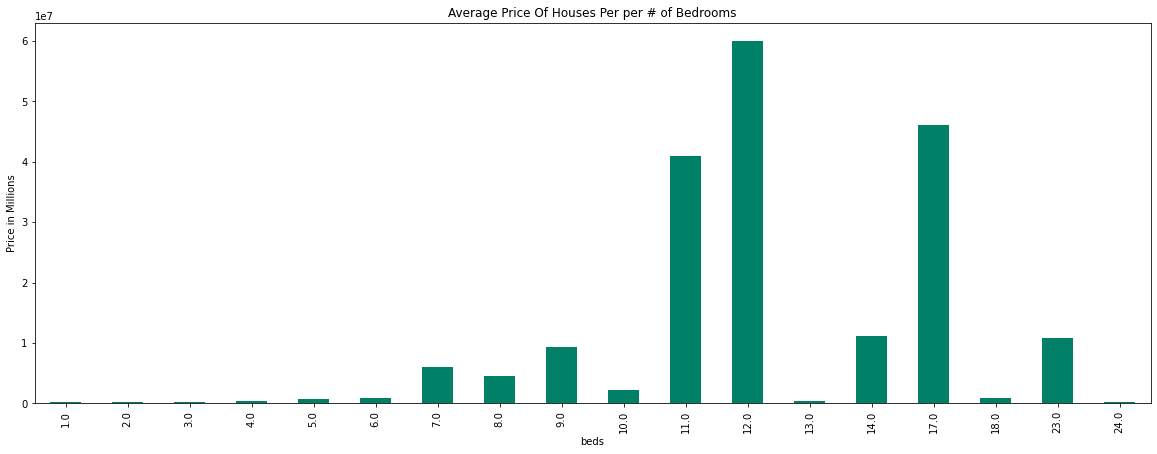

In [51]:
df.groupby('beds')['prices'].mean().plot(kind='bar', figsize=(20,7), colormap='summer', title='Average Price Of Houses Per per # of Bedrooms', ylabel='Price in Millions')

In [52]:
# Show average prices of houses per number of baths
df.groupby('baths')['prices'].mean().sort_values(ascending = False)

baths
20.00000    99000000.00000
14.00000    81572111.11111
21.00000    78000000.00000
16.00000    68070714.28571
24.00000    42599950.00000
10.00000    33861633.33333
12.00000    25565000.00000
19.00000    19304285.71429
9.00000     16930555.55556
13.00000    14900000.00000
11.00000    14746133.33333
17.00000    10013333.33333
7.00000      8077860.46512
8.00000      6596373.80952
15.00000     6500000.00000
6.00000      2156403.57558
213.00000    1200000.00000
5.00000      1028073.78599
4.00000       543165.60161
3.00000       398821.98182
2.00000       282016.73831
1.00000       217858.03142
0.00000       145000.00000
Name: prices, dtype: float64

<AxesSubplot:title={'center':'Average Price Of Houses Per per # of Baths'}, xlabel='baths', ylabel='Price in Millions'>

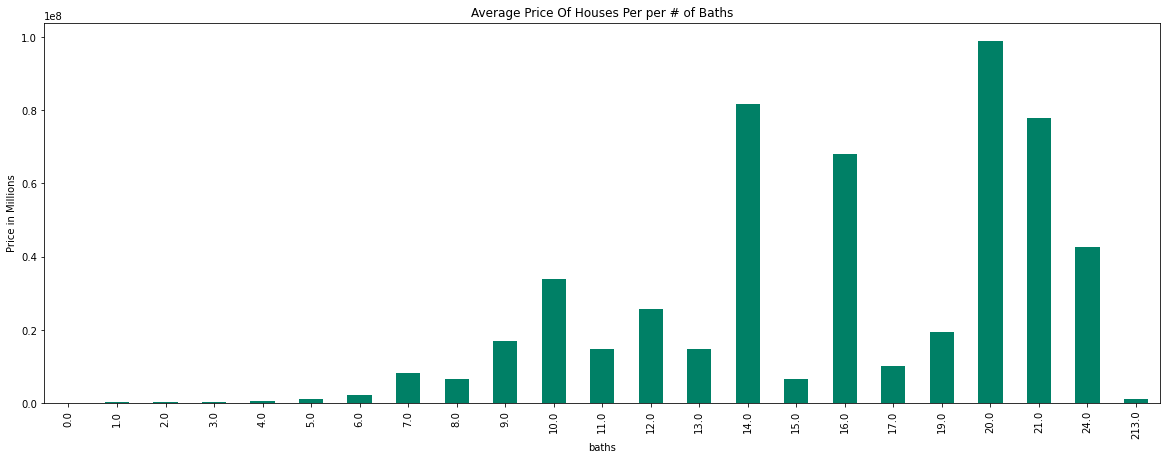

In [53]:
# Show average prices of houses per number of baths
df.groupby('baths')['prices'].mean().plot(kind='bar', figsize=(20,7), colormap='summer', title='Average Price Of Houses Per per # of Baths', ylabel='Price in Millions')

<AxesSubplot:title={'center':'Average Price Of Houses Based on SqFt'}, xlabel='sqft', ylabel='Price in Millions'>

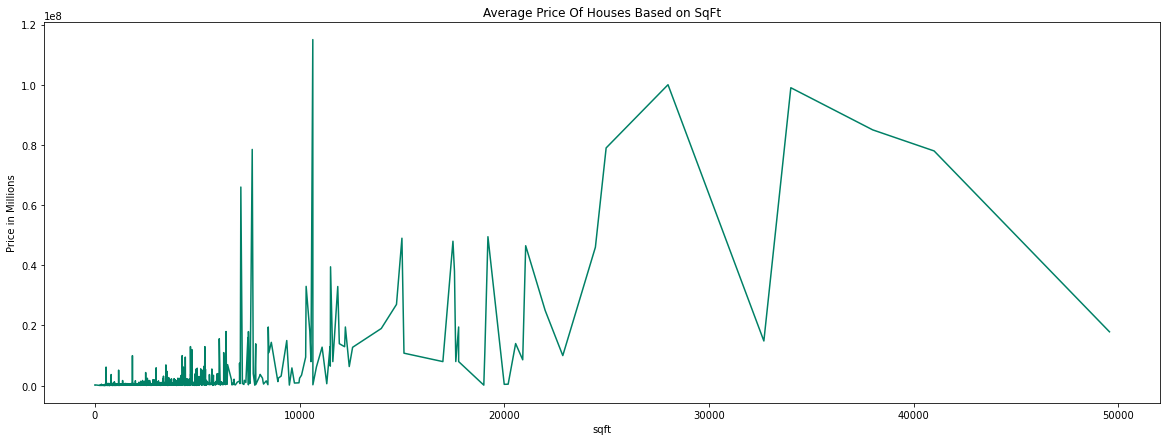

In [54]:
# Show average prices of houses based on sqft
df.groupby('sqft')['prices'].mean().plot(kind='line', figsize=(20,7), colormap='summer', title='Average Price Of Houses Based on SqFt', ylabel='Price in Millions')

#### There do appear to be some inconsistent or anomaly listings still based on:
- House listings with 13, 18, and 24 bedrooms at very low prices
- House listing with 213 baths??? Most likely an incorrect listing

However, we can still see from the visuals a bit of a pattern that shows as the number of bedrooms, baths, and sqft go up, the higher the house prices tend to be.

### Additional Analysis

In [56]:
# Counts by number of beds
df['beds'].value_counts()

3.00000     12199
4.00000      7371
2.00000      2985
5.00000      2001
1.00000       522
6.00000       412
7.00000       103
8.00000        85
10.00000       21
9.00000        21
12.00000       13
11.00000       12
14.00000        3
13.00000        3
23.00000        1
17.00000        1
18.00000        1
24.00000        1
Name: beds, dtype: int64

In [57]:
# Counts by number of baths
df['baths'].value_counts()

2.00000      12060
3.00000       7316
1.00000       3533
4.00000       1988
5.00000        514
6.00000        172
7.00000         43
8.00000         42
11.00000        21
10.00000        12
12.00000        10
14.00000         9
9.00000          9
19.00000         7
16.00000         7
17.00000         3
13.00000         2
24.00000         2
15.00000         1
21.00000         1
0.00000          1
20.00000         1
213.00000        1
Name: baths, dtype: int64

#### We can see above that the majority of house listings contain between 2-5 bedrooms and 1-4 baths per house. We can also see that the higher values for beds and baths occur only a few times and are a small percent of the overall dataset. This is good as these may or may not be correct listings, and should not be effecting the overall accuracy of analysis results.

## Correlation Analysis
- Which variables effect house prices the most?

In [34]:
# Correlation
df.corr()

,prices,beds,baths,sqft
prices,1.00000,0.24425,0.29579,0.52146
beds,0.24425,1.00000,0.41299,0.57137
baths,0.29579,0.41299,1.00000,0.51960
sqft,0.52146,0.57137,0.51960,1.00000


<AxesSubplot:>

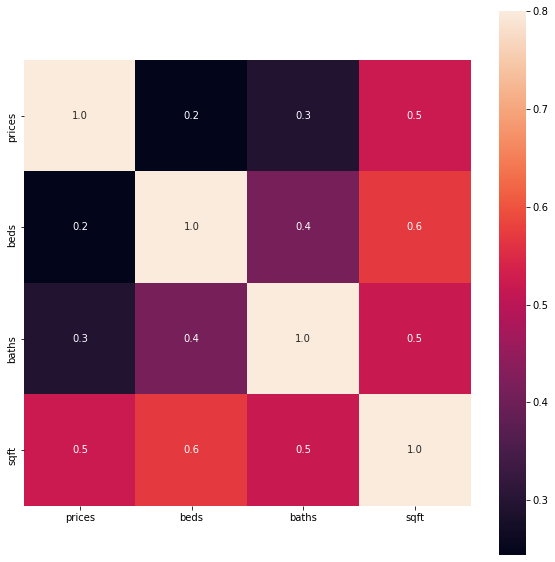

In [35]:
# Correlation plot
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

#### As seen above in the correlation heatmap, beds, baths, and sqft all effect house prices with sqft having a slightly stronger positive relation

## Part Three Final Notes:

#### <center>Business Questions:<center>

#### 1. What are the average prices of houses in each state? Which states are most expensive? Least expensive?

The average house prices in each state were found and listed above in the analysis. The overall average price of houses in the dataset is about $485,025.

Highest priced states in terms of house prices are:
- California
- Colorado
- Hawaii
- Washington DC
- Idaho

Lowest priced states in terms of house prices are:
- West Virginia
- Iowa
- Mississippi
- Kentucky
- Indiana


#### 2. How many house listings are under the overall average of house listings? How many houses priced over $1 million?

In the dataset, there are 21,511 listings that are less than or equal to the overall average price of houses (485,025). This is roughly 80 percent of the overall listings that fall under or equal the overall average price in all states.

There are 672 house listings that are priced at 1 Million or more


#### 3. What are the average prices of homes based on beds, baths, and SqFt?

The average prices for all three house detail variables were found and listed above in the analysis. From the analysis and visuals, it appeared that as all three of these variables increased house priced tended to increase.

#### 4. Which variables appear to impact house prices? # of beds? # of baths? SqFt?
After running correlation analysis, all three variables are significant to the price of houses, with all three having positive relations and SqFt being more significant to house prices. As the number of beds, baths, and sqft increase, so does the price of houses.

### <center>Things to Consider:<center>

As I dug deeper into the master dataset of Zillow housing data scraped and the analysis, there still appeared to be some inconsistent data that may have skewed or caused slightly inaccurate results after data processing and cleaning. These included:
- Large numbers of bedrooms and baths that may have been incorrectly listed or during the scraping process were placed into wring columns
- Some house price listings being very low ($1, $10, etc.)

We can see some of these possible slightly skewed values in the "Additional Analysis" section above. However, as we can see there are not a large number of these high values present in the dataset as explained in the section.

#### This project will now conclude with part four where I will create an interactive dynamic Power BI dashboard using the Zillow housing data.